In [67]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
plt.figure(figsize=(20, 10))


<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

In [256]:
df= pd.read_csv('heart.csv')
saturations = pd.read_csv('o2Saturation.csv')

In [4]:
saturations.head()

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5


In [5]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Exploratory Analysis

<Figure size 720x1440 with 0 Axes>

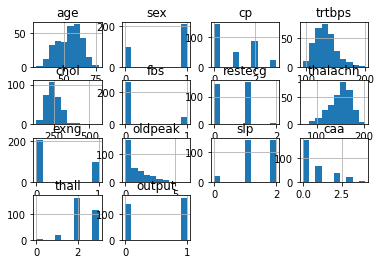

In [18]:
plt.figure(figsize=(10,20))

df.hist()
plt.show()

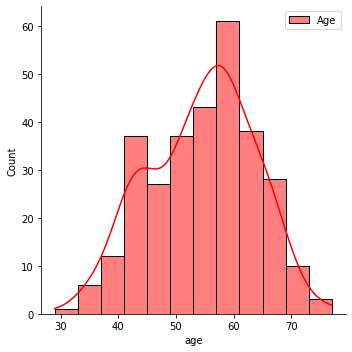

In [36]:

sns.displot(df.age, color="red", label="Age", kde= True)
plt.legend()

In [22]:
df.head(2)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


<function matplotlib.pyplot.legend(*args, **kwargs)>

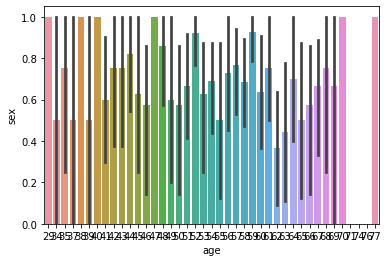

In [37]:
sns.barplot(x='age', y='sex', data=df, label='sex' )
plt.legend

In [38]:
df.head(2)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


Text(0, 0.5, 'cp')

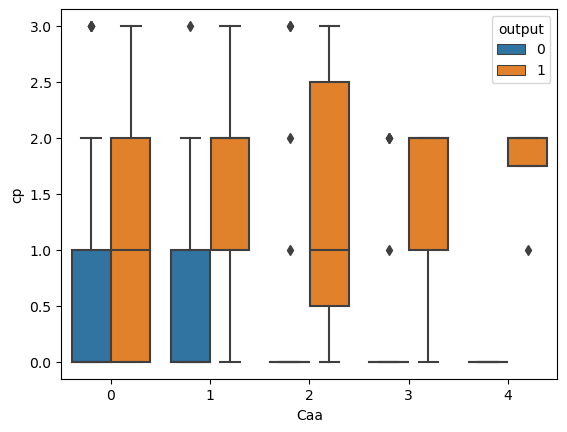

In [49]:
sns.boxplot(data=df,
    x='caa',
    y='cp',
    hue='output')
plt.xlabel('Caa'),
plt.ylabel('cp')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 [Text(0, 0, '29'),
  Text(1, 0, '34'),
  Text(2, 0, '35'),
  Text(3, 0, '37'),
  Text(4, 0, '38'),
  Text(5, 0, '39'),
  Text(6, 0, '40'),
  Text(7, 0, '41'),
  Text(8, 0, '42'),
  Text(9, 0, '43'),
  Text(10, 0, '44'),
  Text(11, 0, '45'),
  Text(12, 0, '46'),
  Text(13, 0, '47'),
  Text(14, 0, '48'),
  Text(15, 0, '49'),
  Text(16, 0, '50'),
  Text(17, 0, '51'),
  Text(18, 0, '52'),
  Text(19, 0, '53'),
  Text(20, 0, '54'),
  Text(21, 0, '55'),
  Text(22, 0, '56'),
  Text(23, 0, '57'),
  Text(24, 0, '58'),
  Text(25, 0, '59'),
  Text(26, 0, '60'),
  Text(27, 0, '61'),
  Text(28, 0, '62'),
  Text(29, 0, '63'),
  Text(30, 0, '64'),
  Text(31, 0, '65'),
  Text(32, 0, '66'),
  Text(33, 0, '67'),
  Text(34, 0, '68'),
  Text(35, 0, '69'),
  Text(36, 0, '70'),
  Text(37, 0, '71'),
  Text(38, 0, '74'),
 

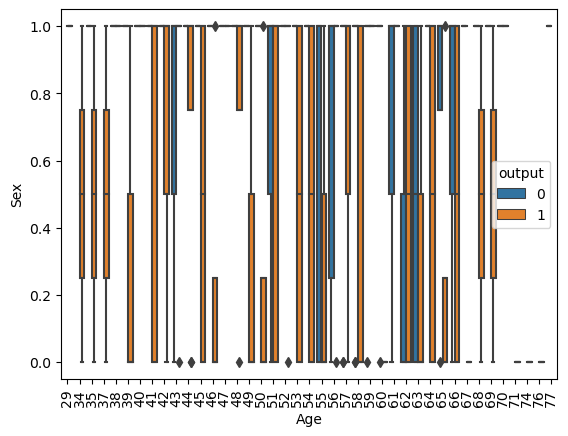

In [51]:
sns.boxplot(data=df,
    x='age',
    y='sex',
    hue='output')
plt.xlabel('Age'),
plt.ylabel('Sex')
plt.xticks(rotation=90)

# Split The Data into the X and Y 

In [70]:
y = df.pop('output')
X = df


In [76]:
X.shape

(303, 13)

In [77]:
y.shape

(303,)

# Split into X_train, X_test

In [90]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [91]:
print('Shape for training data', x_train.shape, y_train.shape)
print('Shape for testing data', x_test.shape, y_test.shape)

Shape for training data (242, 13) (242,)
Shape for testing data (61, 13) (61,)


In [79]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [154]:
x_train.shape


TensorShape([242, 13])

In [285]:
model1 = LogisticRegression(max_iter=100000)
model1.fit(x_train, y_train)


LogisticRegression(max_iter=100000)

In [286]:
y_pred1 = model1.predict(x_test)
y_pred1

C:\Users\Nazbeen\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [288]:
model_1= r2_score(y_test, pred1)
model_1

0.5398706896551724

In [273]:
def plot_predict(train_data =x_train[:,0],
                 train_label =y_train,
                 test_data =x_test.iloc[:,0],
                 test_label =y_test,
                 predictions = y_pred1):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_label, c='b', label="Training Data")

  plt.scatter(test_data, test_label, c='r', label="Training Data")
  plt.scatter(test_data, predictions, c='g', label="Training Data")

  plt.legend()

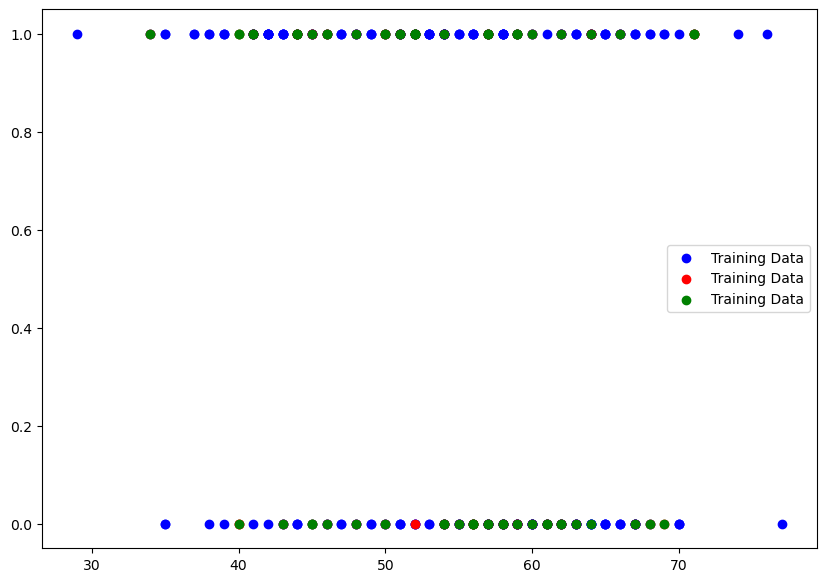

In [289]:
plot_predict()

In [276]:
pred1=model1.predict(x_test)
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print()
print()
print ("The accuracy of Logistic Regression is :", r2_score(y_test, pred1))

Confusion Matrix : 
 [[29  0]
 [29  3]]


The accuracy of Logistic Regression is : 0.5398706896551724


C:\Users\Nazbeen\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [210]:
tf.random.set_seed(42)
model2 =tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[13]),
    tf.keras.layers.Dense(1, )

])

model2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

In [211]:
model2.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 100)               1400      
                                                                 
 dense_39 (Dense)            (None, 1)                 101       
                                                                 
Total params: 1,501
Trainable params: 1,501
Non-trainable params: 0
_________________________________________________________________


In [212]:
history = model2.fit(x_train, y_train, epochs=500)


Epoch 1/500
8/8 [==============================] - 1s 5ms/step - loss: 18.4641 - mae: 18.4641
Epoch 2/500
8/8 [==============================] - 0s 7ms/step - loss: 9.6077 - mae: 9.6077
Epoch 3/500
8/8 [==============================] - 0s 10ms/step - loss: 7.1137 - mae: 7.1137
Epoch 4/500
8/8 [==============================] - 0s 6ms/step - loss: 5.6672 - mae: 5.6672
Epoch 5/500
8/8 [==============================] - 0s 5ms/step - loss: 3.9863 - mae: 3.9863
Epoch 6/500
8/8 [==============================] - 0s 10ms/step - loss: 2.7909 - mae: 2.7909
Epoch 7/500
8/8 [==============================] - 0s 7ms/step - loss: 1.7460 - mae: 1.7460
Epoch 8/500
8/8 [==============================] - 0s 5ms/step - loss: 1.6855 - mae: 1.6855
Epoch 9/500
8/8 [==============================] - 0s 6ms/step - loss: 1.3920 - mae: 1.3920
Epoch 10/500
8/8 [==============================] - 0s 7ms/step - loss: 1.3755 - mae: 1.3755
Epoch 11/500
8/8 [==============================] - 0s 6ms/step - loss: 1.3

8/8 [==============================] - 0s 4ms/step - loss: 0.6758 - mae: 0.6758
Epoch 90/500
8/8 [==============================] - 0s 5ms/step - loss: 0.6130 - mae: 0.6130
Epoch 91/500
8/8 [==============================] - 0s 7ms/step - loss: 0.6707 - mae: 0.6707
Epoch 92/500
8/8 [==============================] - 0s 6ms/step - loss: 0.7362 - mae: 0.7362
Epoch 93/500
8/8 [==============================] - 0s 11ms/step - loss: 0.5322 - mae: 0.5322
Epoch 94/500
8/8 [==============================] - 0s 7ms/step - loss: 0.6441 - mae: 0.6441
Epoch 95/500
8/8 [==============================] - 0s 5ms/step - loss: 0.4892 - mae: 0.4892
Epoch 96/500
8/8 [==============================] - 0s 5ms/step - loss: 0.3432 - mae: 0.3432
Epoch 97/500
8/8 [==============================] - 0s 5ms/step - loss: 0.6611 - mae: 0.6611
Epoch 98/500
8/8 [==============================] - 0s 6ms/step - loss: 0.6981 - mae: 0.6981
Epoch 99/500
8/8 [==============================] - 0s 7ms/step - loss: 0.6899 - m

8/8 [==============================] - 0s 4ms/step - loss: 0.6199 - mae: 0.6199
Epoch 177/500
8/8 [==============================] - 0s 4ms/step - loss: 0.7065 - mae: 0.7065
Epoch 178/500
8/8 [==============================] - 0s 6ms/step - loss: 0.7467 - mae: 0.7467
Epoch 179/500
8/8 [==============================] - 0s 12ms/step - loss: 0.4055 - mae: 0.4055
Epoch 180/500
8/8 [==============================] - 0s 8ms/step - loss: 0.5398 - mae: 0.5398
Epoch 181/500
8/8 [==============================] - 0s 10ms/step - loss: 0.5955 - mae: 0.5955
Epoch 182/500
8/8 [==============================] - 0s 8ms/step - loss: 1.0829 - mae: 1.0829
Epoch 183/500
8/8 [==============================] - 0s 12ms/step - loss: 1.2567 - mae: 1.2567
Epoch 184/500
8/8 [==============================] - 0s 9ms/step - loss: 1.1735 - mae: 1.1735
Epoch 185/500
8/8 [==============================] - 0s 6ms/step - loss: 1.0530 - mae: 1.0530
Epoch 186/500
8/8 [==============================] - 0s 9ms/step - loss

8/8 [==============================] - 0s 5ms/step - loss: 0.6049 - mae: 0.6049
Epoch 264/500
8/8 [==============================] - 0s 5ms/step - loss: 0.3891 - mae: 0.3891
Epoch 265/500
8/8 [==============================] - 0s 5ms/step - loss: 0.5018 - mae: 0.5018
Epoch 266/500
8/8 [==============================] - 0s 5ms/step - loss: 0.5691 - mae: 0.5691
Epoch 267/500
8/8 [==============================] - 0s 4ms/step - loss: 0.4181 - mae: 0.4181
Epoch 268/500
8/8 [==============================] - 0s 4ms/step - loss: 0.5801 - mae: 0.5801
Epoch 269/500
8/8 [==============================] - 0s 5ms/step - loss: 0.5679 - mae: 0.5679
Epoch 270/500
8/8 [==============================] - 0s 5ms/step - loss: 0.6445 - mae: 0.6445
Epoch 271/500
8/8 [==============================] - 0s 5ms/step - loss: 0.4573 - mae: 0.4573
Epoch 272/500
8/8 [==============================] - 0s 6ms/step - loss: 0.5823 - mae: 0.5823
Epoch 273/500
8/8 [==============================] - 0s 5ms/step - loss: 0

8/8 [==============================] - 0s 5ms/step - loss: 0.3273 - mae: 0.3273
Epoch 351/500
8/8 [==============================] - 0s 5ms/step - loss: 0.3378 - mae: 0.3378
Epoch 352/500
8/8 [==============================] - 0s 5ms/step - loss: 0.3881 - mae: 0.3881
Epoch 353/500
8/8 [==============================] - 0s 5ms/step - loss: 0.5023 - mae: 0.5023
Epoch 354/500
8/8 [==============================] - 0s 5ms/step - loss: 0.5722 - mae: 0.5722
Epoch 355/500
8/8 [==============================] - 0s 5ms/step - loss: 0.4394 - mae: 0.4394
Epoch 356/500
8/8 [==============================] - 0s 5ms/step - loss: 0.6698 - mae: 0.6698
Epoch 357/500
8/8 [==============================] - 0s 6ms/step - loss: 0.6804 - mae: 0.6804
Epoch 358/500
8/8 [==============================] - 0s 5ms/step - loss: 0.5009 - mae: 0.5009
Epoch 359/500
8/8 [==============================] - 0s 5ms/step - loss: 0.6811 - mae: 0.6811
Epoch 360/500
8/8 [==============================] - 0s 6ms/step - loss: 0

8/8 [==============================] - 0s 4ms/step - loss: 0.5156 - mae: 0.5156
Epoch 438/500
8/8 [==============================] - 0s 4ms/step - loss: 0.6632 - mae: 0.6632
Epoch 439/500
8/8 [==============================] - 0s 4ms/step - loss: 0.4311 - mae: 0.4311
Epoch 440/500
8/8 [==============================] - 0s 5ms/step - loss: 0.3881 - mae: 0.3881
Epoch 441/500
8/8 [==============================] - 0s 4ms/step - loss: 0.5506 - mae: 0.5506
Epoch 442/500
8/8 [==============================] - 0s 5ms/step - loss: 0.6070 - mae: 0.6070
Epoch 443/500
8/8 [==============================] - 0s 6ms/step - loss: 0.4195 - mae: 0.4195
Epoch 444/500
8/8 [==============================] - 0s 4ms/step - loss: 0.2939 - mae: 0.2939
Epoch 445/500
8/8 [==============================] - 0s 5ms/step - loss: 0.4307 - mae: 0.4307
Epoch 446/500
8/8 [==============================] - 0s 5ms/step - loss: 0.5633 - mae: 0.5633
Epoch 447/500
8/8 [==============================] - 0s 4ms/step - loss: 0

In [213]:
pred2 = model2.predict(x_test)
pred2[0]

2/2 [==============================] - 0s 7ms/step


array([0.25978258], dtype=float32)

In [215]:
model2.evaluate(x_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - mae: 0.0000e+00


[0.0, 0.0]

In [291]:
model_2 = r2_score(y_test, pred2)
model_2

0.49283337459827214

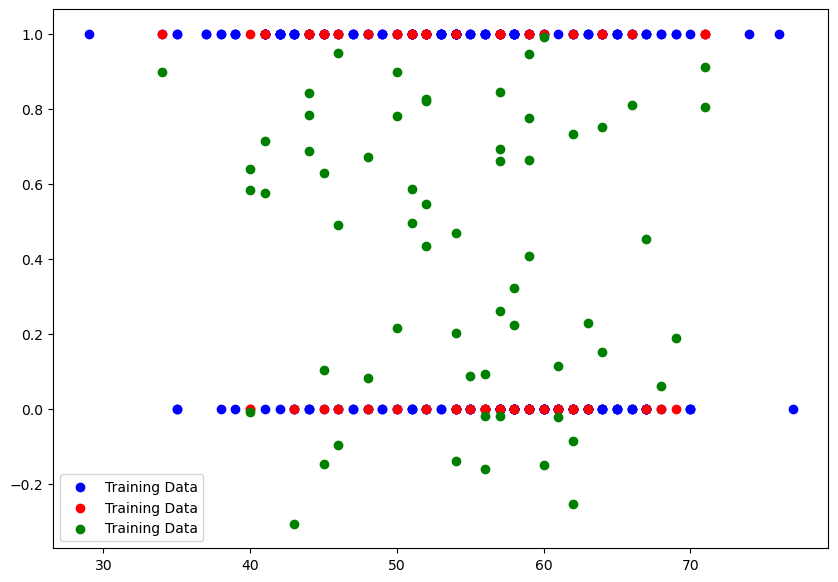

In [217]:
plot_predict(predictions=pred2)

# Regressoin 

In [219]:
from sklearn.linear_model import LinearRegression

In [220]:
Reg = LinearRegression()
Reg.fit(x_train, y_train)

LinearRegression()

In [222]:
pred3 = model.predict(x_test)
pred3[0]

2/2 [==============================] - 0s 5ms/step


array([0.09980098], dtype=float32)

In [293]:
from sklearn.metrics import r2_score

model_3 = r2_score(y_test, pred3)
model_3

0.4976522341267712

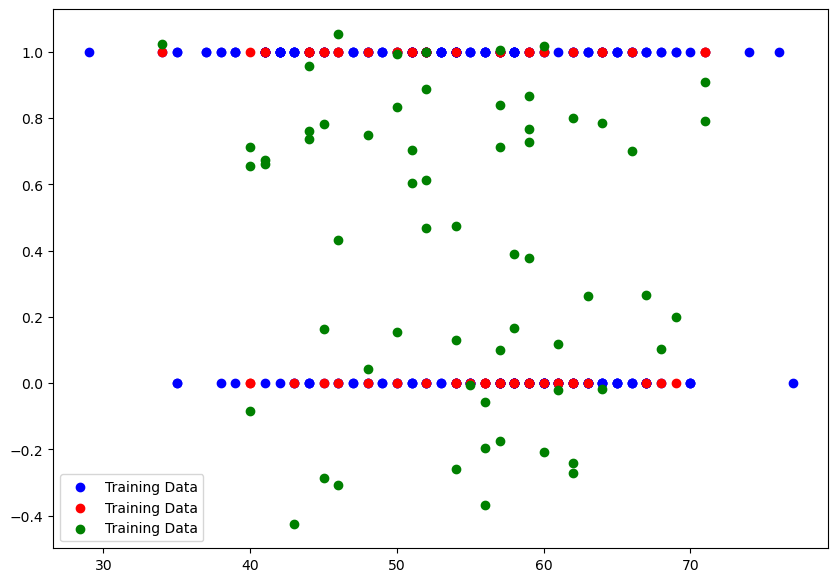

In [223]:
plot_predict(predictions=pred3)

In [230]:
from sklearn.tree import DecisionTreeRegressor

In [231]:
model4 = DecisionTreeRegressor()
model4.fit(x_train, y_train)

DecisionTreeRegressor()

In [233]:
pred4= model4.predict(x_test)
pred4

C:\Users\Nazbeen\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


array([0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [295]:
model_4= r2_score(y_test, pred4)
model_4

0.2769396551724138

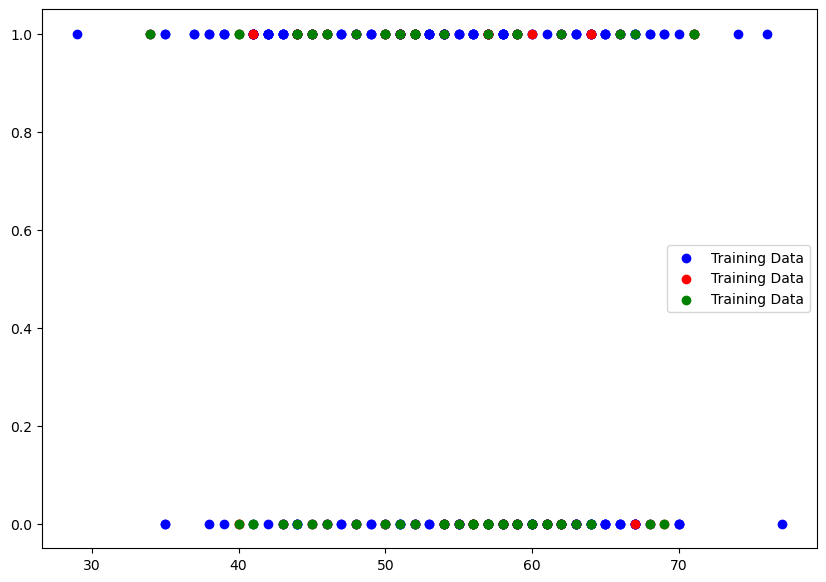

In [296]:
plot_predict(predictions=pred4)

# RandomForestClassifier

In [261]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=500)
rfc.fit(x_train,y_train)


RandomForestClassifier(n_estimators=500)

In [262]:
pred5=rfc.predict(x_test)
pred5



C:\Users\Nazbeen\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [297]:

model_5 =accuracy_score(y_test,pred5)
model_5

0.8524590163934426

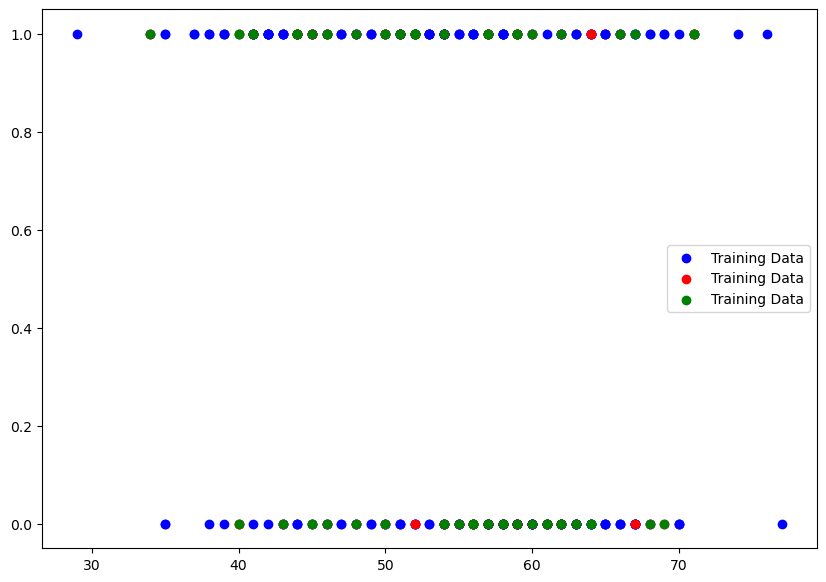

In [298]:
plot_predict(predictions=pred5)

# KNeighborsClassifier

In [321]:
from sklearn.neighbors import KNeighborsRegressor

knn=KNeighborsRegressor(n_neighbors=1)
knn.fit(x_train, y_train)


KNeighborsRegressor(n_neighbors=1)

In [326]:

pred6=knn.predict(x_test.values)
model_6 = r2_score(y_test,pred6)
model_6

-51.185344827586185

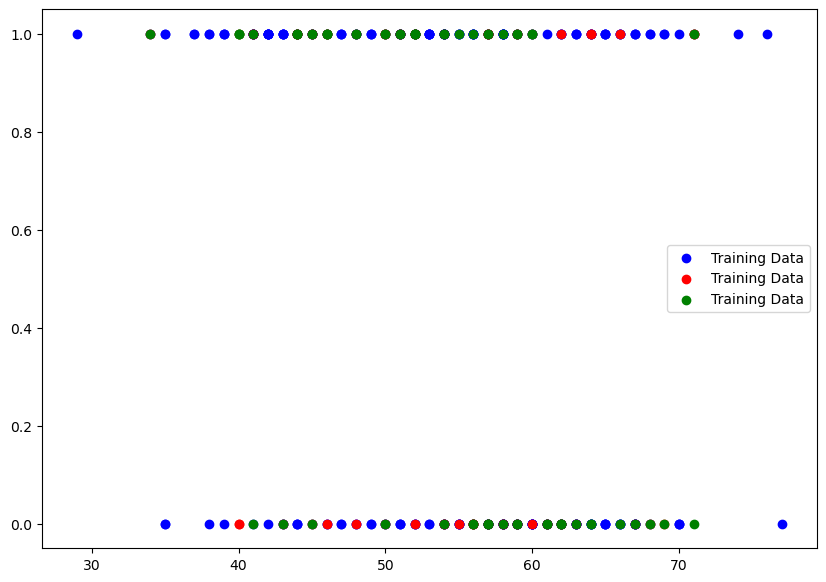

In [311]:
plot_predict(predictions=preds)

In [337]:
model_result = [["model_1 -LogisticRegression ", model_1, ''],
                ["model_2 -Tensorflow Api", model_2,  ''],
                ["model_3 -LinearRegression", model_3,  ''],
                ["model_4 -DecisionTreeRegresso", model_4,  ''],
                ["model_5 -RandomForestClassifier", model_5,  'good- model'],
                ["model_6 -KNeighborsRegressor", model_6,  '']
                
                ]


all_models = pd.DataFrame(model_result, columns=['models', 'Scores', 'good-acc'])

In [338]:
all_models

,models,Scores,good-acc
0,model_1 -LogisticRegression,0.539871,
1,model_2 -Tensorflow Api,0.492833,
2,model_3 -LinearRegression,0.497652,
3,model_4 -DecisionTreeRegresso,0.276940,
4,model_5 -RandomForestClassifier,0.852459,good- model
5,model_6 -KNeighborsRegressor,-51.185345,


InvalidIndexError: (slice(None, None, None), None)

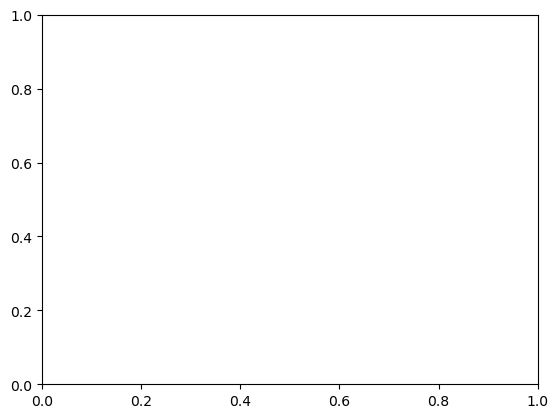

In [376]:
cat = ["bored", "happy", "bored", "bored", "happy", "bored"]
dog = ["happy", "happy", "happy", "happy", "bored", "bored"]
activity = ["combing", "drinking", "feeding", "napping", "playing", "washing"]

fig, ax = plt.subplots()
ax.plot(all_models, all_models['models'], label="dog")
ax.plot(all_models, all_models['Scores'], label="cat")
ax.legend()

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(array([-60., -50., -40., -30., -20., -10.,   0.,  10.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

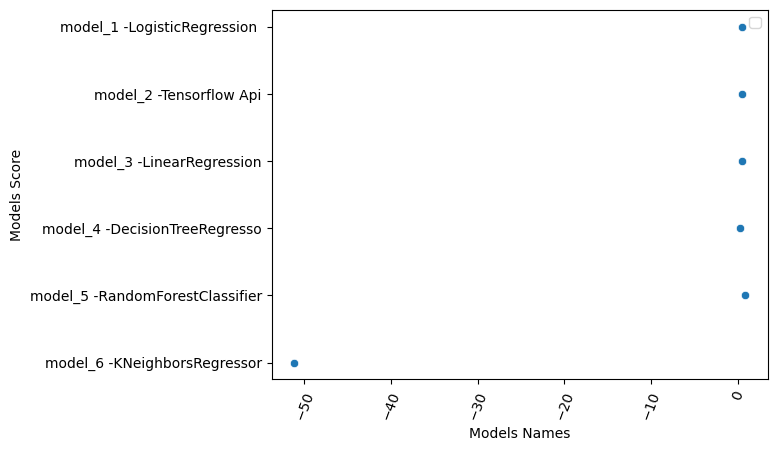

In [371]:
sns.scatterplot( x='Scores', y='models',data=all_models)
plt.xlabel('Models Names')
plt.ylabel('Models Score')
plt.legend()
plt.xticks(rotation=70)